# Instructor Do: Random Forests

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

import pydotplus
from IPython.display import Image

## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
cardio_df = pd.read_csv("clean_cardio_data.csv")
cardio_df = cardio_df.drop(columns = ['Unnamed: 0'])
cardio_df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,2,1,1,0,0,1,0,4,1,0,1,0,0
1,1,3,1,0,0,1,1,5,3,0,0,1,0
2,1,3,1,0,0,0,1,4,1,0,1,0,0
3,2,1,1,0,0,1,1,3,2,0,0,1,0
4,1,2,2,0,0,0,0,6,2,0,1,0,0


In [3]:
# Define features set
X = cardio_df.copy()
X.drop("cardio", axis=1, inplace=True)
X.head()

,gender,cholesterol,gluc,smoke,alco,active,age_years,bmi,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,2,1,1,0,0,1,4,1,0,1,0,0
1,1,3,1,0,0,1,5,3,0,0,1,0
2,1,3,1,0,0,0,4,1,0,1,0,0
3,2,1,1,0,0,1,3,2,0,0,1,0
4,1,2,2,0,0,0,6,2,0,1,0,0


In [4]:
# Define target vector
y = cardio_df["cardio"].ravel()
y[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [7]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [8]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [9]:
# Create a random forest classifier, Estimator is the number of trees
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 78)

In [10]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [11]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5818,2049
Actual 1,2843,4917


Accuracy Score : 0.6869520701350227
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      7867
           1       0.71      0.63      0.67      7760

    accuracy                           0.69     15627
   macro avg       0.69      0.69      0.69     15627
weighted avg       0.69      0.69      0.69     15627



## Feature Importance

In [15]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance(the key drivers that is helping make the decisions)
#zip creats a list and sort in descending order
sorted(zip(rf_model.feature_importances_, X.columns), reverse = True)

[(0.26378630101764844, 'Hypertension Stage 2'),
 (0.2001120207614953, 'age_years'),
 (0.14737505417968244, 'cholesterol'),
 (0.11167760726246871, 'bmi'),
 (0.062075996690652765, 'Normal'),
 (0.049279172407954826, 'gluc'),
 (0.04868327736274551, 'Hypertension Stage 1'),
 (0.030413184777854194, 'active'),
 (0.028601476873736605, 'gender'),
 (0.02214558662064639, 'smoke'),
 (0.02040060294885753, 'alco'),
 (0.015449719096257265, 'Elevated')]

In [16]:
importances

array([0.02860148, 0.14737505, 0.04927917, 0.02214559, 0.0204006 ,
       0.03041318, 0.20011202, 0.11167761, 0.01544972, 0.04868328,
       0.2637863 , 0.062076  ])

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

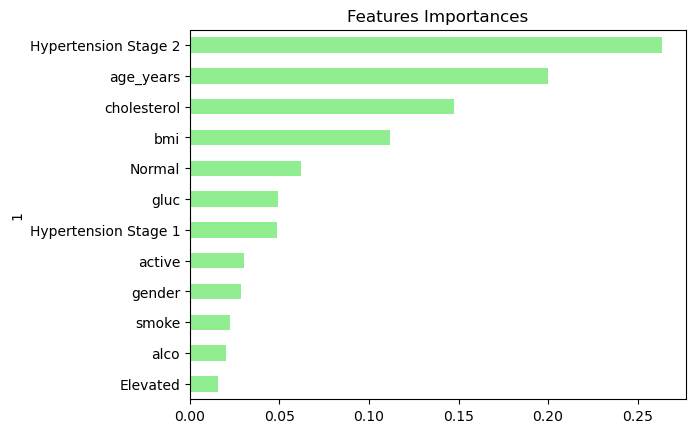

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [18]:
importances_df

,Feature Importances
1,
Hypertension Stage 2,0.263786
age_years,0.200112
cholesterol,0.147375
bmi,0.111678
Normal,0.062076
gluc,0.049279
Hypertension Stage 1,0.048683
active,0.030413
gender,0.028601


In [19]:
importances1_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))

In [20]:
importances1_df.set_index(importances1_df[1], inplace=True)

In [21]:
importances1_df

,0,1
1,,
Hypertension Stage 2,0.263786,Hypertension Stage 2
age_years,0.200112,age_years
cholesterol,0.147375,cholesterol
bmi,0.111678,bmi
Normal,0.062076,Normal
gluc,0.049279,gluc
Hypertension Stage 1,0.048683,Hypertension Stage 1
active,0.030413,active
gender,0.028601,gender
